In [335]:
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='retina' 

### Задание 1.

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпи\-рической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). 

Будет полезно: https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html

(Должна получиться картина, как в конце презентации https://edu.tinkoff.ru/course/181/unit/5064/view)

In [336]:
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF

In [337]:
# Генерация выборки из стандартного нормального распределения
N = 10000
X = st.norm.rvs(loc=0, scale=1, size=N)
X

array([ 0.148356  , -0.22903386, -1.0461265 , ..., -2.17212995,
        0.56651231,  0.06356716])

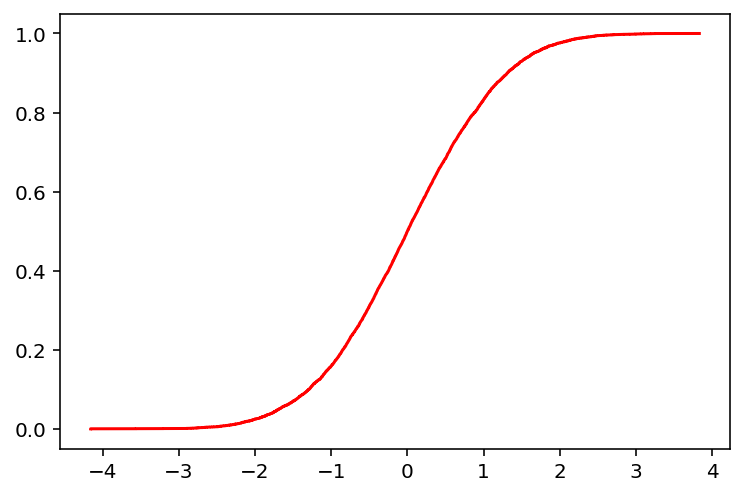

In [338]:
# Построим эмпирическую функцию распределения по выборке
ecdf = ECDF(X)
plt.step(ecdf.x,ecdf.y, color='red')

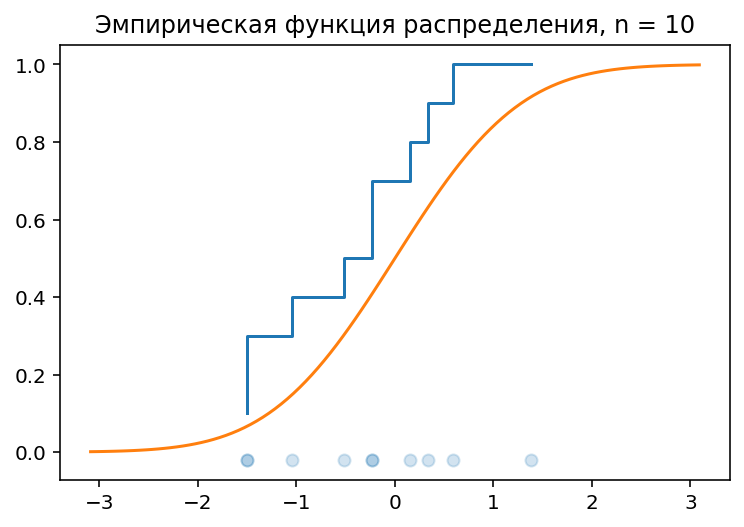

In [339]:
# Построим для некоторого n график эмпирической функции распределения
n = 10
ecdf_1 = ECDF(X[0:n])
plt.title('Эмпирическая функция распределения, n = 10')
plt.step(ecdf_1.x,ecdf_1.y)
# Отметим на оси абсцисс точки "скачков" кривых, нанеся подвыборку на ось абсцисс
plt.scatter(ecdf_1.x, np.zeros(n + 1)-0.02, alpha=0.2) #alpha -- прозрачность
# Нанесем истинную функцию распределения
grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=1), st.norm.ppf(0.999, loc=0, scale=1), 100)
plt.plot(grid, st.norm.cdf(grid, scale=1))
plt.show()

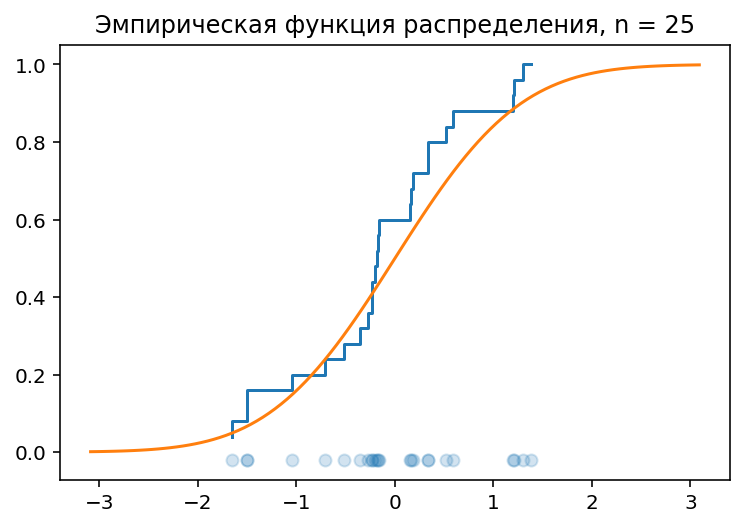

In [340]:
# Повторим для различных n
n = 25
ecdf_2 = ECDF(X[0:n])
plt.title('Эмпирическая функция распределения, n = 25')
plt.step(ecdf_2.x,ecdf_2.y)
plt.scatter(ecdf_2.x, np.zeros(n + 1)-0.02, alpha=0.2) #alpha -- прозрачность
grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=1), st.norm.ppf(0.999, loc=0, scale=1), 100)
plt.plot(grid, st.norm.cdf(grid, scale=1))
plt.show()

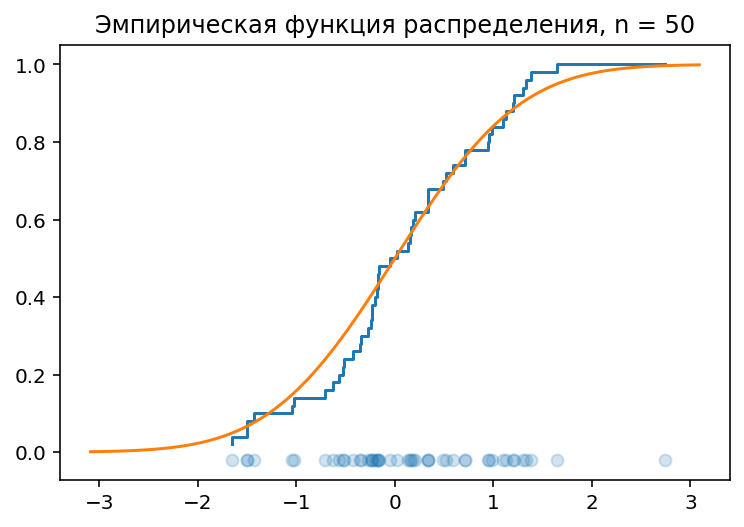

In [341]:
n = 50
ecdf_3 = ECDF(X[0:n])
plt.step(ecdf_3.x,ecdf_3.y)
plt.title('Эмпирическая функция распределения, n = 50')
plt.scatter(ecdf_3.x, np.zeros(n + 1)-0.02, alpha=0.2) #alpha -- прозрачность
grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=1), st.norm.ppf(0.999, loc=0, scale=1), 100)
plt.plot(grid, st.norm.cdf(grid, scale=1))
plt.show()

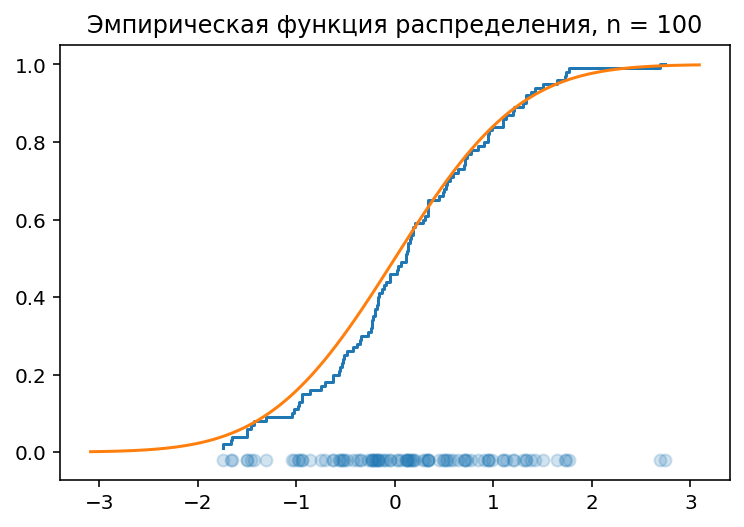

In [342]:
n = 100
ecdf_4 = ECDF(X[0:n])
plt.title('Эмпирическая функция распределения, n = 100')
plt.step(ecdf_4.x,ecdf_4.y)
plt.scatter(ecdf_4.x, np.zeros(n + 1)-0.02, alpha=0.2) #alpha -- прозрачность
grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=1), st.norm.ppf(0.999, loc=0, scale=1), 100)
plt.plot(grid, st.norm.cdf(grid, scale=1))
plt.show()

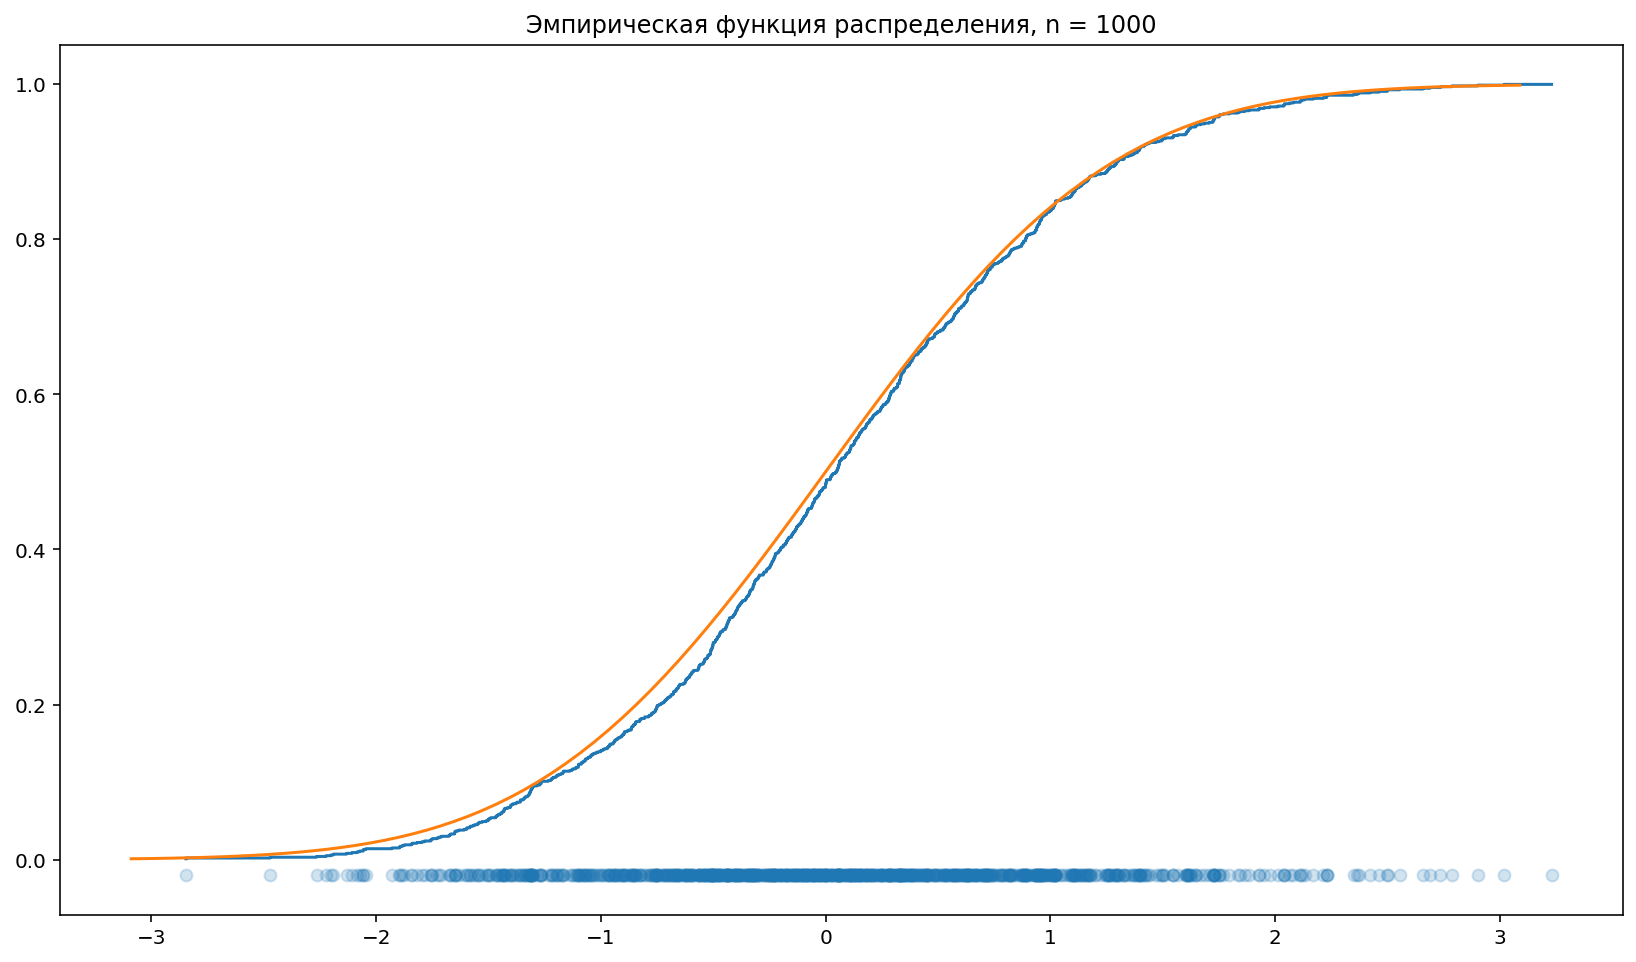

In [343]:
n = 1000
ecdf_5 = ECDF(X[0:n])
plt.figure(figsize=(14,8))
plt.title('Эмпирическая функция распределения, n = 1000')
plt.step(ecdf_5.x,ecdf_5.y)
plt.scatter(ecdf_5.x, np.zeros(n + 1)-0.02, alpha=0.2) #alpha -- прозрачность
grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=1), st.norm.ppf(0.999, loc=0, scale=1), 100)
plt.plot(grid, st.norm.cdf(grid, scale=1))
plt.show()

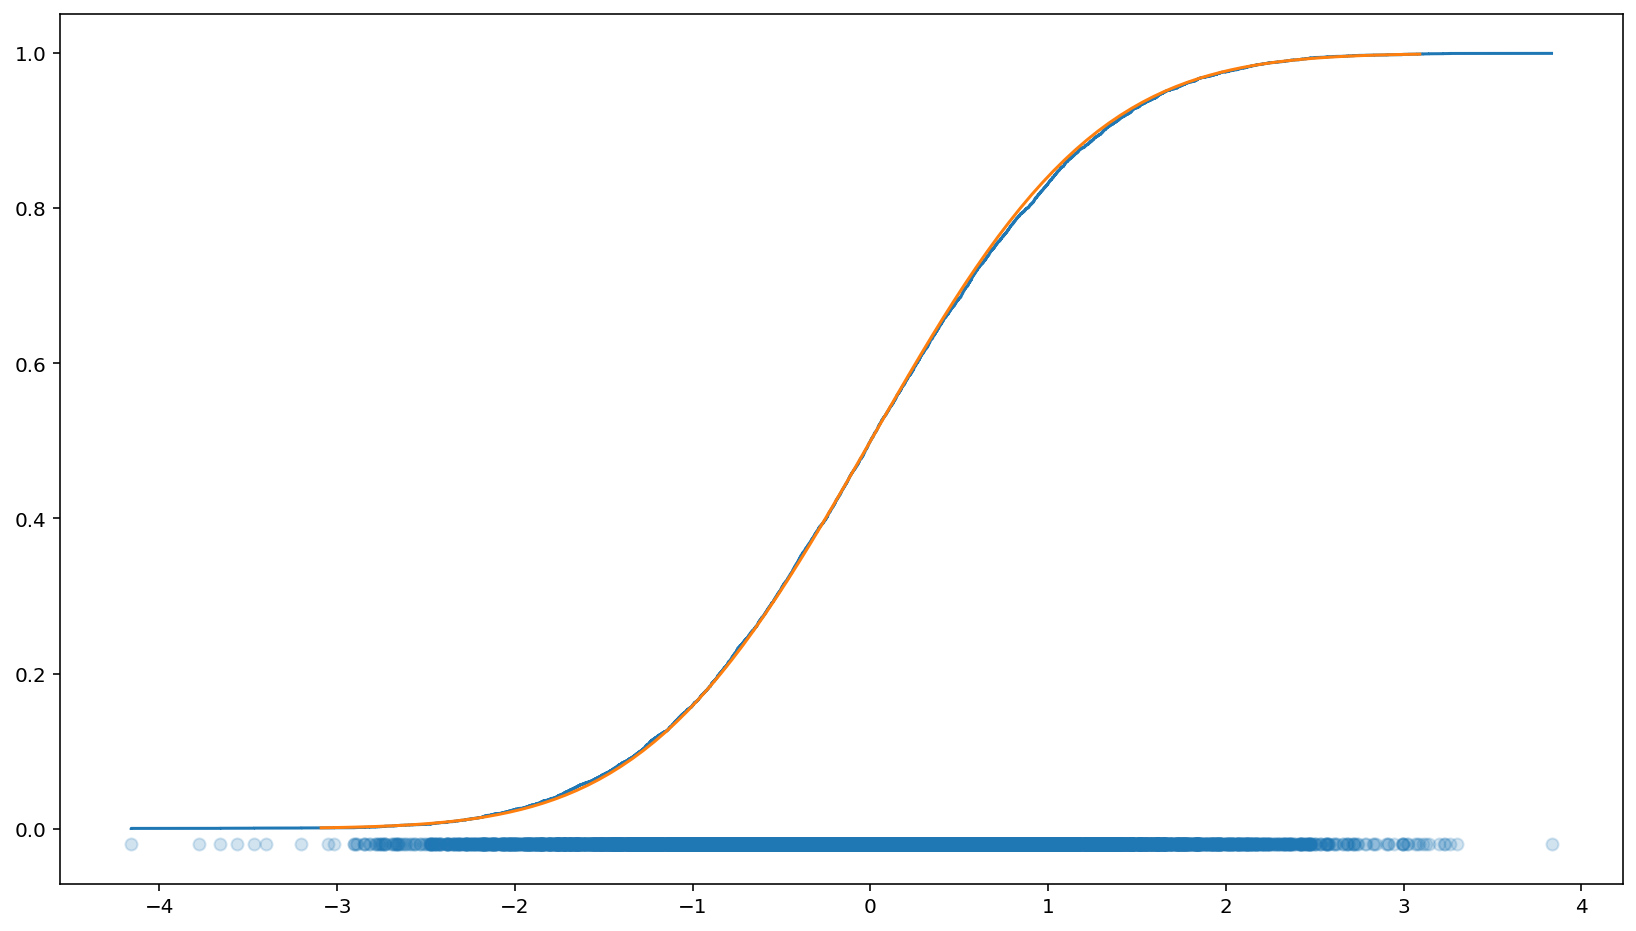

In [344]:
n = 10000
plt.figure(figsize=(14,8))
ecdf_6 = ECDF(X[0:n])
plt.step(ecdf_6.x,ecdf_6.y)
plt.scatter(ecdf_6.x, np.zeros(n + 1)-0.02, alpha=0.2) #alpha -- прозрачность
grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=1), st.norm.ppf(0.999, loc=0, scale=1), 100)
plt.plot(grid, st.norm.cdf(grid, scale=1))
plt.show()

### Задание 2. Задача Бюффона о бросании иглы

Классическая формулировка задачи выглядит так:

На разлинованный лист бумаги, расстояния между линиями $r=1$ бросают иглы длиной $L < r$. Какова вероятность того, что игла попадет на линию? 

Для этой задачи существует теоретическое решение:

$$p = \dfrac{2L}{r\pi}\ \ \ \ \ (1)$$.

**Задание**

Проведем эксперимент, найдем вероятность пересечения иглой линии из эксперимента. С помощью теоретического решения найдем значение числа $\pi$.

https://ru.wikipedia.org/wiki/Задача_Бюффона_о_бросании_иглы

Сгенерируем две случайные величины $X1$ и $Y1$ из равномерного распределения. Это будут координаты одно из концов иглы. Сгенерируем случайную величину $\alpha$ из $U[0, 2\pi]$, она будет отвечать за угол между иглой и горизонтальной осью. Так как длина иглы $L$ задана изначально, то координаты конца иглы:

$$X_2 = X_1 + L \cdot \cos(\alpha)$$
$$Y_2 = Y_1 + L \cdot \sin(\alpha)$$

Отобразите на полотне отрезки, соответсвующие каждой игле. Проведите горизонтальные линии, пригодится https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html. (Должна получиться картина, как в конце презентации https://edu.tinkoff.ru/course/181/unit/5064/view)

Так как расстояние между горизонтальными линиями 1, то пересечение иглы с линией можно найти так: спроецируем иглы на вертикальную ось, получим отрезки $[y_2, y_1]$. Если в пределах отрезка $[y_2, y_1]$ лежит целое число, значит проекция, а соотвественно и игла, пересекают горизонтальную ось. Найдем долю игл, пересекающий горизонтальную линию. Эта доля и будет оценкой вероятности в формуле (1). Зная вероятность, из формулы (1) можно выразить значение числа $\pi$.


In [345]:
r = 1 # расстояние между прямыми
L = 0.5 # длина иглы

# Генерация координат одного из концов иглы
X1 = st.uniform.rvs(loc=0, scale=20,size=1)
Y1 = st.uniform.rvs(loc=0, scale=10,size=1)
# Генерация СВ, отвечающей за угол
a = st.uniform.rvs(loc=0, scale=2*math.pi, size=1)[0]
# Вычисление координат второго конца иглы
X2 = X1 + L * np.cos(a)
Y2 = Y1 + L * np.sin(a)


Пересечение:  False


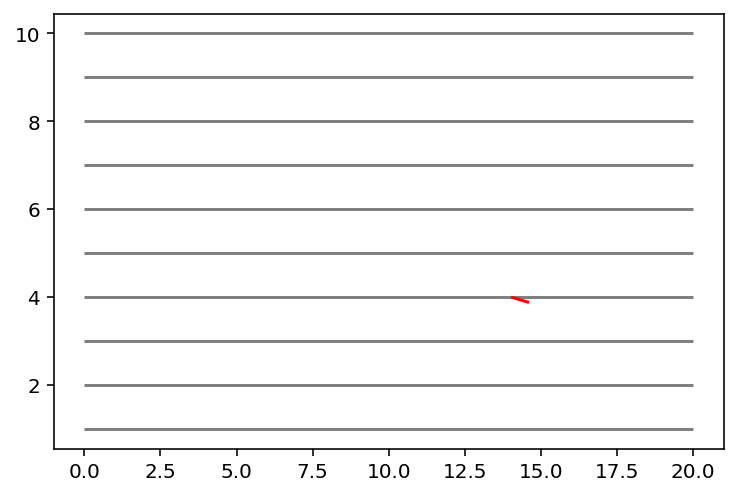

In [346]:
plt.hlines(np.arange(1,11,1), 0, 20, color='grey')
plt.plot([X1,X2],[Y1,Y2], color='red')
print('Пересечение: ', abs(int(Y2)-int(Y1)) >= 1)

In [347]:
def float_to_int(x):
    return np.int(x)

float_to_int_array = np.vectorize(float_to_int)

Частота пересечения:  0.2
Число pi:  5.0
Ошибка: -1.8584073464102069


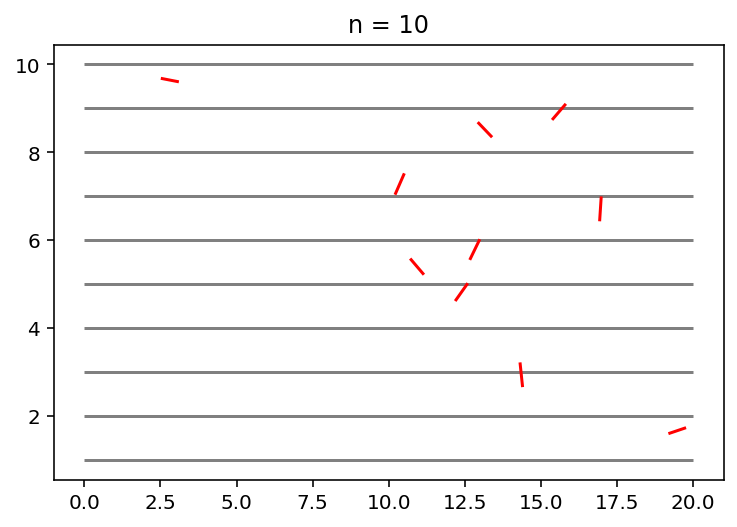

In [348]:
# Проведем эксперименты с разным количеством бросков n
n = 10
X1 = st.uniform.rvs(loc=0, scale=20,size=n)
Y1 = st.uniform.rvs(loc=0, scale=10,size=n)
a = st.uniform.rvs(loc=0, scale=2*math.pi, size=n)
X2 = X1 + L * np.cos(a)
Y2 = Y1 + L * np.sin(a)

mask = abs(float_to_int_array(Y1) - float_to_int_array(Y2)) >= 1

plt.hlines(np.arange(1,11,1), 0, 20, color='grey')
plt.plot([X1,X2],[Y1,Y2], color='red')
plt.title('n = 10')

p = X1[mask].shape[0] / n
print('Частота пересечения: ', p)
print('Число pi: ', 2 * L / p)
print('Ошибка:', math.pi - 2 * L / p)

Частота пересечения:  0.36
Число pi:  2.7777777777777777
Ошибка: 0.36381487581201544


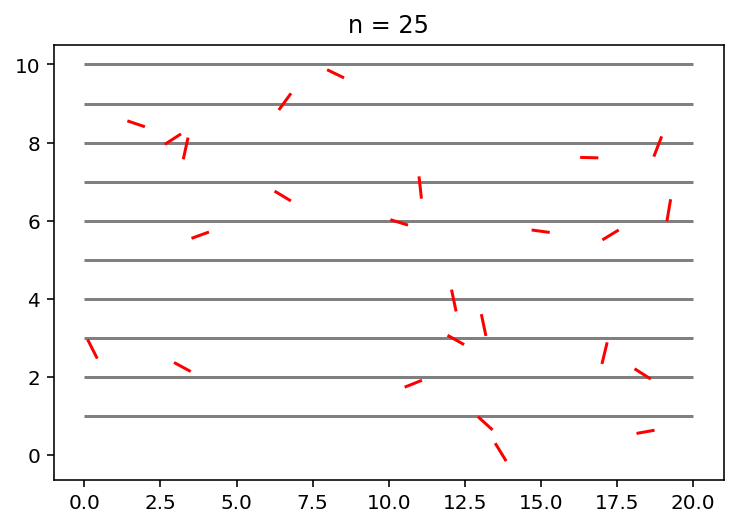

In [349]:
n = 25
X1 = st.uniform.rvs(loc=0, scale=20,size=n)
Y1 = st.uniform.rvs(loc=0, scale=10,size=n)
a = st.uniform.rvs(loc=0, scale=2*math.pi, size=n)
X2 = X1 + L * np.cos(a)
Y2 = Y1 + L * np.sin(a)

mask = abs(float_to_int_array(Y1) - float_to_int_array(Y2)) >= 1

plt.hlines(np.arange(1,11,1), 0, 20, color='grey')
plt.plot([X1,X2],[Y1,Y2], color='red')
plt.title('n = 25')

p = X1[mask].shape[0] / n
print('Частота пересечения: ', p)
print('Число pi: ', 2 * L / p)
print('Ошибка:', math.pi - 2 * L / p)

Частота пересечения:  0.32
Число pi:  3.125
Ошибка: 0.016592653589793116


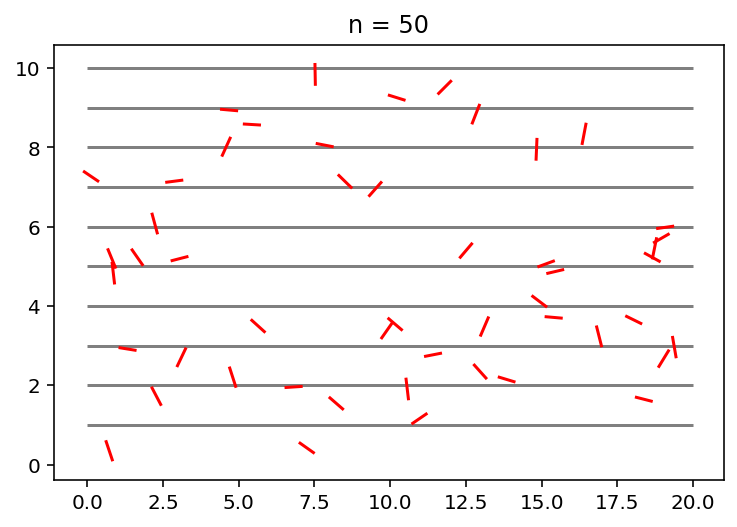

In [350]:
n = 50
X1 = st.uniform.rvs(loc=0, scale=20,size=n)
Y1 = st.uniform.rvs(loc=0, scale=10,size=n)
a = st.uniform.rvs(loc=0, scale=2*math.pi, size=n)
X2 = X1 + L * np.cos(a)
Y2 = Y1 + L * np.sin(a)

mask = abs(float_to_int_array(Y1) - float_to_int_array(Y2)) >= 1

plt.hlines(np.arange(1,11,1), 0, 20, color='grey')
plt.plot([X1,X2],[Y1,Y2], color='red')
plt.title('n = 50')

p = X1[mask].shape[0] / n
print('Частота пересечения: ', p)
print('Число pi: ', 2 * L / p)
print('Ошибка:', math.pi - 2 * L / p)

Частота пересечения:  0.21
Число pi:  4.761904761904762
Ошибка: -1.6203121083149687


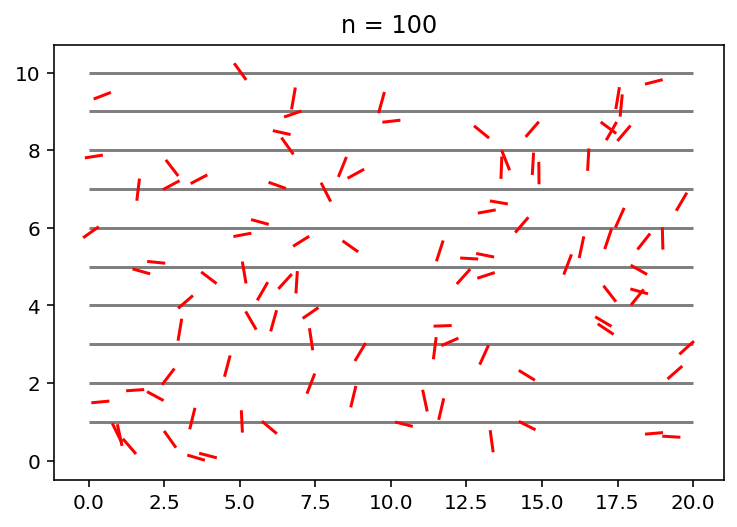

In [351]:
n = 100
X1 = st.uniform.rvs(loc=0, scale=20,size=n)
Y1 = st.uniform.rvs(loc=0, scale=10,size=n)
a = st.uniform.rvs(loc=0, scale=2*math.pi, size=n)
X2 = X1 + L * np.cos(a)
Y2 = Y1 + L * np.sin(a)

mask = abs(float_to_int_array(Y1) - float_to_int_array(Y2)) >= 1

plt.hlines(np.arange(1,11,1), 0, 20, color='grey')
plt.plot([X1,X2],[Y1,Y2], color='red')
plt.title('n = 100')

p = X1[mask].shape[0] / n
print('Частота пересечения: ', p)
print('Число pi: ', 2 * L / p)
print('Ошибка:', math.pi - 2 * L / p)

Частота пересечения:  0.316
Число pi:  3.1645569620253164
Ошибка: -0.02296430843552333


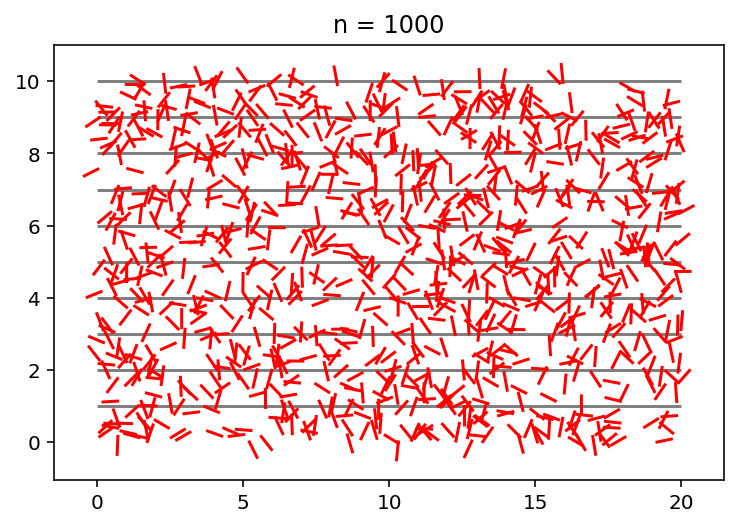

In [352]:
n = 1000
X1 = st.uniform.rvs(loc=0, scale=20,size=n)
Y1 = st.uniform.rvs(loc=0, scale=10,size=n)
a = st.uniform.rvs(loc=0, scale=2*math.pi, size=n)
X2 = X1 + L * np.cos(a)
Y2 = Y1 + L * np.sin(a)

mask = abs(float_to_int_array(Y1) - float_to_int_array(Y2)) >= 1

plt.hlines(np.arange(1,11,1), 0, 20, color='grey')
plt.plot([X1,X2],[Y1,Y2], color='red')
plt.title('n = 1000')

p = X1[mask].shape[0] / n
print('Частота пересечения: ', p)
print('Число pi: ', 2 * L / p)
print('Ошибка:', math.pi - 2 * L / p)

Частота пересечения:  0.3036
Число pi:  3.293807641633729
Ошибка: -0.15221498804393585


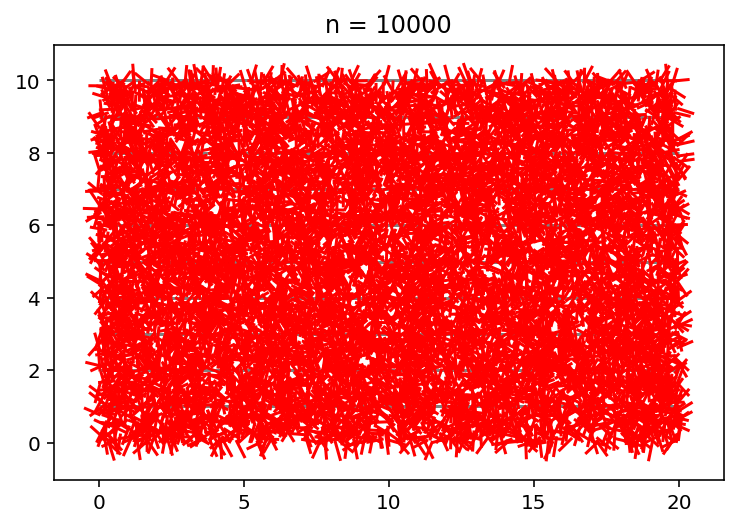

In [353]:
n = 10000
X1 = st.uniform.rvs(loc=0, scale=20,size=n)
Y1 = st.uniform.rvs(loc=0, scale=10,size=n)
a = st.uniform.rvs(loc=0, scale=2*math.pi, size=n)
X2 = X1 + L * np.cos(a)
Y2 = Y1 + L * np.sin(a)

mask = abs(float_to_int_array(Y1) - float_to_int_array(Y2)) >= 1

plt.hlines(np.arange(1,11,1), 0, 20, color='grey')
plt.plot([X1,X2],[Y1,Y2], color='red')
plt.title('n = 10000')

p = X1[mask].shape[0] / n
print('Частота пересечения: ', p)
print('Число pi: ', 2 * L / p)
print('Ошибка:', math.pi - 2 * L / p)

In [354]:
# Проведем эксперименты с разным количеством бросков n
n = 100000
X1 = st.uniform.rvs(loc=0, scale=20,size=n)
Y1 = st.uniform.rvs(loc=0, scale=10,size=n)
a = st.uniform.rvs(loc=0, scale=2*math.pi, size=n)
X2 = X1 + L * np.cos(a)
Y2 = Y1 + L * np.sin(a)

mask = abs(float_to_int_array(Y1) - float_to_int_array(Y2)) >= 1

# plt.hlines(np.arange(1,11,1), 0, 20, color='grey')
# plt.plot([X1,X2],[Y1,Y2], color='red')
# plt.title('n = 100000')

p = X1[mask].shape[0] / n
print('Частота пересечения: ', p)
print('Число pi: ', 2 * L / p)
print('Ошибка:', math.pi - 2 * L / p)

Частота пересечения:  0.30147
Число pi:  3.3170796430822302
Ошибка: -0.17548698949243713
